In [8]:
# apt-get install graphviz
# pip install graphviz


from IPython.display import display
from IPython.display import Markdown

def print_md(*args, sep = ' ', end = '\n'):    
    text = sep.join(list([str(arg) for arg in args])) + (end if end != '\n' else '')
    display(Markdown(text))

# to use whole screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os

# Define the directory you want to add to PATH
directory_to_add = "/usr/bin"

# Get the current PATH
current_path = os.environ.get('PATH')

# Add your directory to the PATH
new_path = directory_to_add + os.pathsep + current_path

# Set the new PATH
os.environ['PATH'] = new_path

In [3]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot_ng(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.2f | grad %.2f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [4]:
def validname(variablename):
    valid_chars = set('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_')
    return all(letter in valid_chars for letter in variablename)


In [5]:
import traceback

#classes

class Value:
    def __init__(self, data, _children = (), _op='', label=''):
        # just some label automation
        frame_info3 = traceback.extract_stack()[-3]
        label3 = frame_info3.line.split('=')[0].strip()
        frame_info2 = traceback.extract_stack()[-2]
        label2 = frame_info2.line.split('=')[0].strip()
        if label:
            self.label = label
        elif validname(label3):
            self.label =  label3
        elif validname(label2):
            self.label = label2
        else:
            label = 'UNKNOWN'
        #
        self.grad = 0
        self.data = data
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
        return f'Vlaue(data={self.data})'
    
    def __add__(self, other):        
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    
#calculations
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
e = a*b
print_md(f'|Operation|Data|\n'
         f'|:---------|:----|\n'
         f'|MULTIPLICATION (a * b):|**{a * b}**|\n'
         f'|ADDITION (a\*b + c):    |**{a*b + c}**|\n'
         f'|EQUIVALENT a.\_\_mul\_\_(b).\_\_add\_\_(c):    |**{a.__mul__(b).__add__(c)}**|\n'
        )
         
d = e + c
d
print_md(f'|Operation|Data|\n'
         f'|:---------|:----|\n'
         f'Operation produced the object d._op:|**{d._op}**|\n'
         f'Childern operands d._prev:|**{d._prev}**|\n')



|Operation|Data|
|:---------|:----|
|MULTIPLICATION (a * b):|**Vlaue(data=-6.0)**|
|ADDITION (a\*b + c):    |**Vlaue(data=4.0)**|
|EQUIVALENT a.\_\_mul\_\_(b).\_\_add\_\_(c):    |**Vlaue(data=4.0)**|


|Operation|Data|
|:---------|:----|
Operation produced the object d._op:|**+**|
Childern operands d._prev:|**{Vlaue(data=-6.0), Vlaue(data=10.0)}**|


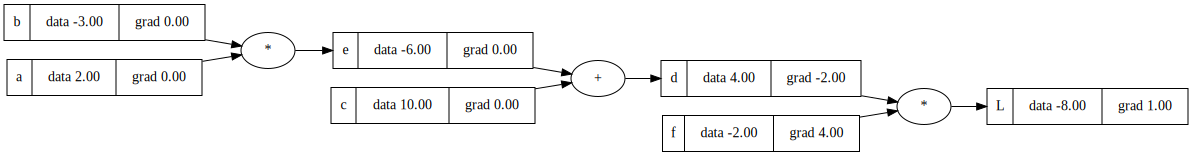

In [6]:
f = Value(-2.0)
L = d * f
L.grad = 1
d.grad = -2.0
f.grad = 4.0

draw_dot_ng(L)

In [7]:
def lol():
    h = 0.0001
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e + c
    f = Value(-2.0)
    L = d * f
    L1 = L.data
    #
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e + c
    d.data += h
    f = Value(-2.0 )
    L = d * f
    L2 = L.data 
    
    print_md('#', (L2 - L1)/h )

lol()

# -1.9999999999953388